In [15]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import os

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array, load_img

import random
import os
os.getcwd()
#print(os.listdir("../Train_data"))

# Any results you write to the current directory are saved as output.

'/content'

In [16]:
saree_dir = os.path.join('/content/drive/My Drive/Webscraping_classification/train/sarees')
Jeans_dir = os.path.join('/content/drive/My Drive/Webscraping_classification/train/Jeans')
Trousers_dir = os.path.join('/content/drive/My Drive/Webscraping_classification/train/Trousers')

print('Total training saree images:', len(os.listdir(saree_dir)))
print('Total training Jeans images:', len(os.listdir(Jeans_dir)))
print('Total training Trouser images:', len(os.listdir(Trousers_dir)))

Total training saree images: 101
Total training Jeans images: 101
Total training Trouser images: 101


In [8]:
from scipy import ndimage, misc
import numpy as np
import os
import cv2

import imageio
import imgaug as ia
import imgaug.augmenters as iaa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib
%matplotlib inline



In [23]:
TRAINING_DIR = "/content/drive/My Drive/Webscraping_classification/train"

training_datagen = ImageDataGenerator(rescale = 1./255,
                             rotation_range=(30),
                             brightness_range=[0.2,1.0],
                             #brightness_range=[1.0,1.5],
                             horizontal_flip=True)

VALIDATION_DIR = "/content/drive/My Drive/Webscraping_classification/test"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_data = training_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size=(150,150),
    class_mode='categorical',save_to_dir='/content/drive/My Drive/Webscraping_classification/Augmented_images',
    save_prefix='P',save_format='jpeg',batch_size=300)

validation_data = validation_datagen.flow_from_directory(
    VALIDATION_DIR,
    target_size=(150,150),
    class_mode='categorical')


Found 300 images belonging to 3 classes.
Found 60 images belonging to 3 classes.


In [24]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
    ])

In [25]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)      

In [26]:
model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [27]:
history = model.fit_generator(train_data, epochs=25, validation_data = validation_data, verbose = 1)

model.save("mp.h5")

Epoch 1/25
1/1 [==============================] - 25s 25s/step - loss: 1.0992 - accuracy: 0.3300 - val_loss: 2.3405 - val_accuracy: 0.3333
Epoch 2/25
1/1 [==============================] - 0s 311ms/step - loss: 1.6584 - accuracy: 0.3333 - val_loss: 5.3190 - val_accuracy: 0.3333
Epoch 3/25
1/1 [==============================] - 0s 279ms/step - loss: 3.2754 - accuracy: 0.3333 - val_loss: 1.3344 - val_accuracy: 0.3333
Epoch 4/25
1/1 [==============================] - 0s 295ms/step - loss: 1.1920 - accuracy: 0.3333 - val_loss: 1.0873 - val_accuracy: 0.3333
Epoch 5/25
1/1 [==============================] - 0s 297ms/step - loss: 1.0940 - accuracy: 0.3433 - val_loss: 1.0329 - val_accuracy: 0.6667
Epoch 6/25
1/1 [==============================] - 0s 306ms/step - loss: 1.0632 - accuracy: 0.5700 - val_loss: 0.8898 - val_accuracy: 0.6500
Epoch 7/25
1/1 [==============================] - 0s 317ms/step - loss: 0.9772 - accuracy: 0.6300 - val_loss: 0.7347 - val_accuracy: 0.6500
Epoch 8/25
1/1 [=====

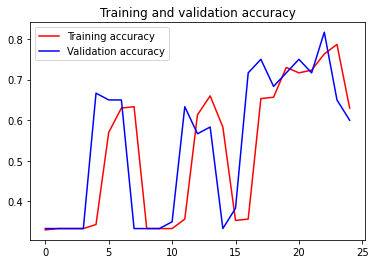

<Figure size 432x288 with 0 Axes>

In [28]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

In [29]:
# load all images into a list
images = []
img_folder = os.path.join('/content/drive/My Drive/Webscraping_classification/validation')
img_files = os.listdir(img_folder)
img_files = [os.path.join(img_folder, f) for f in img_files]
# print(img_files)
for img in img_files:
    img = load_img(img, target_size=(150, 150))
    img = img_to_array(img)
    img = np.expand_dims(img, axis=0)
    images.append(img)

# stack up images list to pass for prediction
images = np.vstack(images)
# print(images)
classes = model.predict_classes(images, batch_size=10)
print(classes)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
[0 0 2 2 2 0 0 0 0 0 0 0 0 0 0]
